In [0]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

Topic Modeling with NMF and SVD 

In [0]:
%matplotlib inline
np.set_printoptions(suppress=True)

Set up data

In [0]:
# seperate categories 
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes') 

# set training and test sets 
newsgroups_train = fetch_20newsgroups(subset = 'train', categories = categories, remove = remove)
newsgroups_test = fetch_20newsgroups(subset = 'test', categories = categories, remove = remove)

In [14]:
# return shape of columns
newsgroups_train.filenames.shape, newsgroups_train.target.shape 

((2034,), (2034,))

In [15]:
# look at some of the data 
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [0]:
# return a subset of the data
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]
newsgroups_train.target[:10] 
num_topics, num_top_words = 6, 8

In [17]:
# extract word counts using skl
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vectorizer = CountVectorizer(stop_words = 'english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense() # (documents, vocab)
vectors.shape

(2034, 26576)

In [18]:
print(len(newsgroups_train.data), vectors.shape)
vocab = np.array(vectorizer.get_feature_names())
vocab.shape
vocab[7000:7020]

2034 (2034, 26576)


array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel',
       'counselees', 'counselor', 'count'], dtype='<U80')

Singluar Value Decomposition 


The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

SVD is used in data science specifically for: 

- semantic analysis
- collaborative filtering / reccomendations (winning entry for the netflix prize)
- calculating the Moore-Penrose pseudoinverse
- data compression
- principal component analysis

Here is a useful youtube video: 
https://www.youtube.com/watch?v=P5mlg91as1c



In [19]:
%time U, s, Vh = linalg.svd(vectors, full_matrices = False)
print(U.shape, s.shape, Vh.shape)

CPU times: user 1min 47s, sys: 6.78 s, total: 1min 53s
Wall time: 59.1 s
(2034, 2034) (2034,) (2034, 26576)


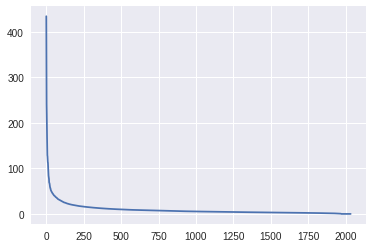

In [20]:
plt.plot(s)

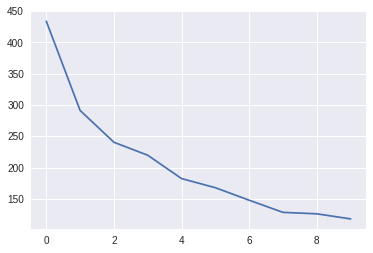

In [21]:
plt.plot(s[:10])

In [22]:
num_top_words = 8

def show_topics(a): 
  top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words - 1: -1]] 
  topic_words = ([top_words(t) for t in a])
  return [' '.join(t) for t in topic_words]

show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

Non-Negative Matrix Factorization (NMF)

Idea: Rather than constraining our factors to be orthogonal, another idea would be to constrain them to be non-negative. NMF is a factorization of a non-negative data set V: 

V = WH 

into non-negative matrices W, H. Often positive factors will be more easily interpretable. 

Applications of NMF include: 

- Face Decompositions
- Collaborative Filtering (e.g. movie reccs)
- Audio source seperation
- Chemistry 
- Bioinformations and Gene Expression 
- Topic Modeling 

Notes: 

  For NMF, matrix needs to be at least as tall as it is wide, or we get an error with fit_transform
  Can use df_min in CountVectorizer to only look at words that were in at least k of the split text

In [23]:
# we will use sklearns implementation of NMF 
m, n = vectors.shape 
d = 5 # num of topics

# run our factorization
clf = decomposition.NMF(n_components = d, random_state = 1) 
W1 = clf.fit_transform(vectors)
H1 = clf.components_ 

# output
show_topics(H1)


['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

TF-IDF is a way to normalize term counts by taking into account how often they appear in a document, how long the document is and how common/rare the term is 

tf = # of occurances of term t in document / # of words in documents 
idf = log(# of documents / # of documents with term t in it)

In [24]:
# encode vectors 
vectorizer_tfidf = TfidfVectorizer(stop_words = 'english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab) 

# NMF components
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_ 

# output
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

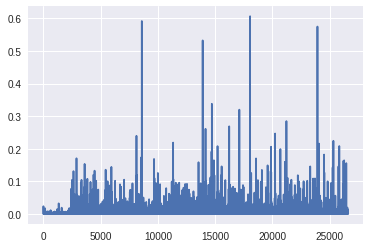

In [25]:
plt.plot(clf.components_[0])

In [26]:
clf.reconstruction_err_

43.712926057952785

Stochastic Gradient Descent 

Goal: Decompose V(mxn) into V = WH where W(mxd) and H(dxn), W, H >= 0 and we've minimized the Frobenius norm of V - WH. 


In [27]:
# set parameters
lam = 1e3
lr = 1e-2
m, n = vectors_tfidf.shape 

W1 = clf.fit_transform(vectors)
H1 = clf.components_

show_topics(H1)


['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [28]:
# for Stochastic Gradient Descent 

mu = 1e-6

def grads(M, W, H):
    R = W@H-M
    return R@H.T + penalty(W, mu)*lam, W.T@R + penalty(H, mu)*lam # dW, dH

def penalty(M, mu):
    return np.where(M>=mu,0, np.min(M - mu, 0))

def upd(M, W, H, lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH
  
def report(M,W,H): 
    print(np.linalg.norm(M-W@H), W.min(), H.min(), (W<0).sum(), (H<0).sum())
  
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

report(vectors_tfidf, W, H)

upd(vectors_tfidf, W, H, lr)

report(vectors_tfidf, W, H)

for i in range(50): 
  upd(vectors_tfidf, W, H, lr)
  if i % 10 == 0: 
    report(vectors_tfidf, W, H)
    
show_topics(H)

44.4259368790468 1.0927543811111194e-06 1.2892915846677065e-07 0 0
44.418205148286816 -0.0007252168341069446 -7.189104656323347e-05 133 247
44.412551554856705 -0.0008532305763942787 -7.76335247083828e-05 140 237
44.37495283075783 -0.0002605126400494636 -5.2357170061541896e-05 41 475
44.34637928789805 -0.00023989831912794445 -6.203097087162157e-05 38 965
44.3145937613589 -0.00019662701075776748 -8.933959123329933e-05 30 1491
44.27961984251647 -9.458806310585547e-05 -9.665630419963582e-05 26 2155


['space god people don does just know like',
 'people god space just don know think like',
 'people god space think just don like know',
 'don god people space think just know like',
 'just god think like people don space know']

PyTorch is a python framework for tensors and dynamic neural networks with GPU acceleration. Its basically numpy with increased parallelization of using a GPU 

In [0]:
import torch 
import torch.cuda as tc 
from torch.autograd import Variable

In [7]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57114000 @  0x7f8f43f5e1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


In [0]:
def V(M):
  return Variable(M, requires_grad = True) 

v = vectors_tfidf.todense() 

t_vectors = torch.Tensor(v.astype(np.float32)).cuda()

In [33]:
mu = 1e-5

def grads_t(M, W, H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W, mu)*lam, 
        W.t().mm(R) + penalty_t(H, mu)*lam) # dW, dH

def penalty_t(M, mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M - mu, max=0.)

def upd_t(M, W, H, lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H): 
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())
  

t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_(); 
t_H.normal_(std=0.01).abs_();

d = 6; lam = 100; lr = 0.05

for i in range(1000): 
    upd_t(t_vectors,t_W,t_H,lr)
    if i % 100 == 0: 
        report_t(t_vectors,t_W,t_H)
        lr *= 0.9

tensor(44.3936, device='cuda:0') tensor(-0.0072, device='cuda:0') tensor(-0.0005, device='cuda:0') tensor(1474, device='cuda:0') tensor(2250, device='cuda:0')
tensor(43.7166, device='cuda:0') tensor(-0.0120, device='cuda:0') tensor(-0.0122, device='cuda:0') tensor(1959, device='cuda:0') tensor(20778, device='cuda:0')
tensor(43.6622, device='cuda:0') tensor(-0.0071, device='cuda:0') tensor(-0.0113, device='cuda:0') tensor(2188, device='cuda:0') tensor(21086, device='cuda:0')
tensor(43.6485, device='cuda:0') tensor(-0.0072, device='cuda:0') tensor(-0.0106, device='cuda:0') tensor(2408, device='cuda:0') tensor(21865, device='cuda:0')
tensor(43.6460, device='cuda:0') tensor(-0.0047, device='cuda:0') tensor(-0.0074, device='cuda:0') tensor(2734, device='cuda:0') tensor(22942, device='cuda:0')
tensor(43.6452, device='cuda:0') tensor(-0.0051, device='cuda:0') tensor(-0.0063, device='cuda:0') tensor(3184, device='cuda:0') tensor(24509, device='cuda:0')
tensor(43.6450, device='cuda:0') tensor(-

In [35]:
show_topics(t_H.cpu().numpy())

['god jesus bible believe atheism christian does belief',
 'thanks graphics files image file program windows know',
 'ico bobbe tek bronx beauchaine manhattan sank queens',
 'don people just think like know say religion',
 'objective morality values moral subjective science absolute claim',
 'space nasa launch shuttle orbit lunar moon earth']

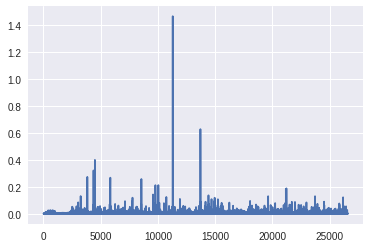

In [36]:
plt.plot(t_H.cpu().numpy()[0])


PyTorch: autograd 

Above we implemented stochastic gradient descent from scratch. Instead owe could use PyTorch's automatic differentiation package autograd. 


In [40]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [41]:
print(x.data)

tensor([[1., 1.],
        [1., 1.]])


In [43]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [44]:
z = y * y * 3
out = z.sum() 
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(108., grad_fn=<SumBackward0>)


In [45]:
out.backward()
print(x.grad)

tensor([[18., 18.],
        [18., 18.]])


Using autograd for NMF

In [0]:
lam = 1e6
pW = Variable(tc.FloatTensor(m, d), requires_grad = True)
pH = Variable(tc.FloatTensor(d, n), requires_grad = True)
pW.data.normal_(std=0.01).abs()
pH.data.normal_(std=0.01).abs(); 

In [0]:
def report():
    W,H = pW.data, pH.data
    print((M-pW.mm(pH)).norm(2).data[0], W.min(), H.min(), (W<0).sum(), (H<0).sum())

def penalty(A):
    return torch.pow((A<0).type(tc.FloatTensor)*torch.clamp(A, max=0.), 2)

def penalize(): return penalty(pW).mean() + penalty(pH).mean()

def loss(): return (M-pW.mm(pH)).norm(2) + penalize()*lam

In [49]:
M = Variable(t_vectors).cuda()
opt = torch.optim.Adam([pW, pH], lr = 1e-3, betas = (0.9, 0.9))
lr = 0.05 
report()

tensor(44.4660, device='cuda:0') tensor(-0.0365, device='cuda:0') tensor(-0.0434, device='cuda:0') tensor(6074, device='cuda:0') tensor(79340, device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# apply SGD using autograd 

for i in range(1000): 
  opt.zero_grad()
  l = loss()
  l.backward()
  opt.step()
  if i % 100 == 99: 
    report()
    lr *= 0.9 # learning rate annealing


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(44.1094, device='cuda:0') tensor(-0.0007, device='cuda:0') tensor(-0.0009, device='cuda:0') tensor(218, device='cuda:0') tensor(8789, device='cuda:0')
tensor(43.8447, device='cuda:0') tensor(-0.0009, device='cuda:0') tensor(-0.0011, device='cuda:0') tensor(347, device='cuda:0') tensor(10991, device='cuda:0')
tensor(43.7586, device='cuda:0') tensor(-0.0005, device='cuda:0') tensor(-0.0006, device='cuda:0') tensor(298, device='cuda:0') tensor(12593, device='cuda:0')
tensor(43.7058, device='cuda:0') tensor(-0.0003, device='cuda:0') tensor(-0.0009, device='cuda:0') tensor(225, device='cuda:0') tensor(12886, device='cuda:0')
tensor(43.6788, device='cuda:0') tensor(-0.0004, device='cuda:0') tensor(-0.0009, device='cuda:0') tensor(215, device='cuda:0') tensor(12779, device='cuda:0')
tensor(43.6684, device='cuda:0') tensor(-0.0003, device='cuda:0') tensor(-0.0008, device='cuda:0') tensor(198, device='cuda:0') tensor(12793, device='cuda:0')
tensor(43.6653, device='cuda:0') tensor(-0.0003

In [51]:
h = pH.data.cpu().numpy()
show_topics(h)

['god atheism believe belief exist does existence atheists',
 'jesus bible christian christians christ law koresh jews',
 'ico bobbe tek bronx beauchaine manhattan sank queens',
 'don think people just objective like morality say',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth']

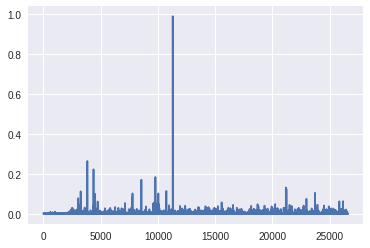

In [52]:
plt.plot(h[0]);

![alt text](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/images/nimfa.png)

Truncated SVD 

When we calculated NMF we only calculated the subset of columns that we were interested in. This saved us a lot of time over singular value decomposition. We can get the subset selection that we want from NMF with SVD by using Truncated SVD. In this case we are only interested in the vectors corresponding to the largest singular values. 


Shortcomings of classical algorithms for decomposition:

Matrices are "stupendously big"

Data are often missing or inaccurate. Why spend extra computational resources when imprecision of input limits precision of the output?

Data transfer now plays a major role in time of algorithms. Techniques the require fewer passes over the data may be substantially faster, even if they require more flops (flops = floating point operations).

Important to take advantage of GPUs.

Advantages of randomized algorithms:

inherently stable

performance guarantees do not depend on subtle spectral properties

needed matrix-vector products can be done in parallel

In [53]:
vectors.shape

(2034, 26576)

In [54]:
%time U, s, Vh = linalg.svd(vectors, full_matrices = False)

CPU times: user 1min 41s, sys: 6.32 s, total: 1min 47s
Wall time: 56 s


In [55]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [56]:
# faster way
%time u, s, v = decomposition.randomized_svd(vectors, 5)

CPU times: user 10.3 s, sys: 1.82 s, total: 12.1 s
Wall time: 6.52 s


In [57]:
u.shape, s.shape, v.shape 

((2034, 5), (5,), (5, 26576))

In [58]:
# using a smaller matrix (with smaller n). Instead of calculating with the full matrix A which is mxn we can use B=AQ which is mxr and r << n
%time u, s, v = decomposition.randomized_svd(vectors, 5)

CPU times: user 10.3 s, sys: 1.82 s, total: 12.1 s
Wall time: 6.58 s


In [59]:
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [60]:
show_topics(v)

['jpeg image edu file graphics images gif data',
 'jpeg gif file color quality image jfif format',
 'space jesus launch god people satellite matthew atheists',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display']

Johnson-Lindenstrauss Lemma: A small set of points in high dimensional space can be embedded into a space of much lower dimension in such a way that distances between the points are nearly preserved.

It is desirable to be able to reduce dimensionality of data in a way that preserves relevant structure. The JL- lemme is a classic result of this type.

Implementing our own Randomized SVD: 

In [0]:
from scipy import linalg

The method randomized_range_finder finds an orthonormal matrix whose range approximates the range of A (step 1 in our algorithm above). To do so, we use the LU and QR factorizations, both of which we will be covering in depth later. 

Scikitlearn randomized svd source code: https://github.com/scikit-learn/scikit-learn/blob/14031f65d144e3966113d3daec836e443c6d7a5b/sklearn/utils/extmath.py

In [0]:
# computes an orthonormal matrix whose range approximates the range of A
# power_iteration_normalizer can be safe_sparse_dot (fast but unstable), LU (in between) or QR (slow but accurate) 

def randomized_range_finder(A, size, n_iter = 5): 
  Q = np.random.normal(size = (A.shape[1], size))
  
  for i in range(n_iter): 
    Q, _ = linalg.lu(A @ Q, permute_l = True)
    Q, _ = linalg.lu(A.T @ Q, permute_l = True) 
    
  Q, _ = linalg.qr(A @ Q, mode = 'economic')
  return Q

def randomized_svd(M, n_components, n_oversamples = 10, n_iter = 4): 
  n_random = n_components + n_oversamples 
  Q = randomized_range_finder(M, n_random, n_iter)
  
  # project M to the (k + p) dimensional space using the basis vectors 
  B = Q.T @ M 
  
  # compute the SVD on the thin matrix: (k + p) wide 
  Uhat, s, V = linalg.svd(B, full_matrices = False) 
  del B
  U = Q @ Uhat
  
  return U[:, :n_components], s[:n_components], V[:n_components, :]

In [63]:
u, s, v = randomized_svd(vectors, 5)
%time u, s, v = randomized_svd(vectors, 5)

CPU times: user 6.77 s, sys: 1.4 s, total: 8.17 s
Wall time: 4.37 s


In [64]:
u.shape, s.shape, v.shape

((2034, 5), (5,), (5, 26576))

In [65]:
show_topics(v)

['jpeg image edu file graphics images gif data',
 'edu graphics data space pub mail 128 3d',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'jpeg graphics space pub edu ray mail send']